In [13]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import hvplot.pandas
import hvplot.xarray
import cartopy.crs as ccrs
import geoviews as gv
import pyproj
import requests

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Import API key
#from api_keys import geoapify_key


In [14]:
crime_df = pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if file.endswith(".csv"):
        crime_df = crime_df.append(pd.read_csv(file))
crime_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
1,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation,NaN
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect,NaN
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified,NaN
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation,NaN


In [15]:
crime_df.isna().sum()


Crime ID                  16454
Month                         0
Reported by                   0
Falls within                  0
Longitude                     0
Latitude                      0
Location                      0
LSOA code                     0
LSOA name                     0
Crime type                    0
Last outcome category     16454
Context                  292913
dtype: int64

In [16]:
crime_df.drop("Context",inplace=True,axis=1)
crime_df


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
1,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [17]:
crime_df.dropna(how="any", inplace=True)

crime_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
5,32b5ba98624cd24da2413933265aaee270c68b111f691b...,2022-01,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham,Violence and sexual offences,Unable to prosecute suspect
6,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...,2022-01,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Birmingham,Vehicle crime,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [18]:
crime_data = crime_df.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_data = crime_data[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code","Last outcome category", "Crime ID"]]
new_crime_data


,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...
5,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Unable to prosecute suspect,32b5ba98624cd24da2413933265aaee270c68b111f691b...
6,Birmingham,2022-01,Vehicle crime,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Investigation complete; no suspect identified,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...
...,...,...,...,...,...,...,...,...,...,...,...
31692,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Under investigation,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...
31693,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Unable to prosecute suspect,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...
31694,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Investigation complete; no suspect identified,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...
31695,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Under investigation,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...


In [19]:
#new_crime_data.groupby(["City Name"]).agg({"Month":"count"})


In [38]:
new_crime_data_bham = new_crime_data.loc[(new_crime_data["City Name"]=="Birmingham")]
new_crime_data_cov = new_crime_data.loc[(new_crime_data["City Name"]=="Coventry")]
new_crime_data_sandwell = new_crime_data.loc[(new_crime_data["City Name"]=="Sandwell")]
new_crime_data_wham = new_crime_data.loc[(new_crime_data["City Name"]=="Wolverhampton")]
new_crime_data_bham

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...
5,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Unable to prosecute suspect,32b5ba98624cd24da2413933265aaee270c68b111f691b...
6,Birmingham,2022-01,Vehicle crime,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Investigation complete; no suspect identified,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...
...,...,...,...,...,...,...,...,...,...,...,...
14102,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.853639,52.445503,On or near Bromyard Road,E01033641,Under investigation,d81238b7058061ce726de62dddb48e1c85ce6892835d19...
14103,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.849881,52.451693,On or near Weston Lane,E01033641,Investigation complete; no suspect identified,4f1cb738f428771f4c2da50873afb7a75708b9e12535ff...
14104,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.861639,52.451599,On or near Evelyn Road,E01033641,Investigation complete; no suspect identified,d5cdf833cef02fc6542a0a556dbedb290420b2ba99ccf0...
14105,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.849881,52.451693,On or near Weston Lane,E01033641,Investigation complete; no suspect identified,e330b25ffe8baa74df341b91b3dbaa2db859ea7b95e136...


In [44]:
bham_df = new_crime_data_bham.groupby(["Month"]).agg({"Crime type":"count"})
bham_df

,Crime type
Month,
2022-01,13103
2022-02,12325
2022-03,13575
2022-04,13066
2022-05,14044
2022-06,14192
2022-07,14623
2022-08,14228
2022-09,13428


Text(0, 0.5, 'number of crimes')

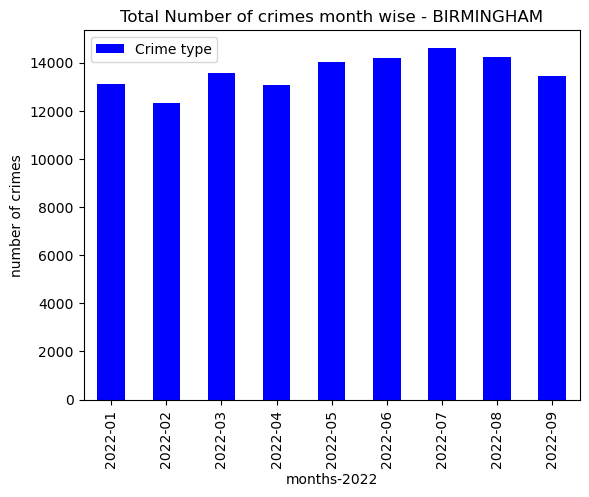

In [32]:
bham_df_plot = bham_df.plot.bar(color = "b")
bham_df_plot
plt.title("Total Number of crimes month wise - BIRMINGHAM")
plt.xlabel("months-2022")
plt.ylabel("number of crimes")



In [45]:
wolverhampton_df = new_crime_data_wham.groupby(["Month"]).agg({"Crime type":"count"})
wolverhampton_df

,Crime type
Month,
2022-01,2868
2022-02,2753
2022-03,2989
2022-04,2979
2022-05,3057
2022-06,3082
2022-07,3137
2022-08,3112
2022-09,2981


In [12]:
cov_df = new_crime_data_cov.groupby(["Month"]).agg({"Crime type":"count"})
cov_df

,Crime type
Month,
2022-01,3264
2022-02,3139
2022-03,3426
2022-04,3465
2022-05,3811
2022-06,3576
2022-07,3649
2022-08,3639
2022-09,3412


NameError: name 'conventry_df_plot' is not defined

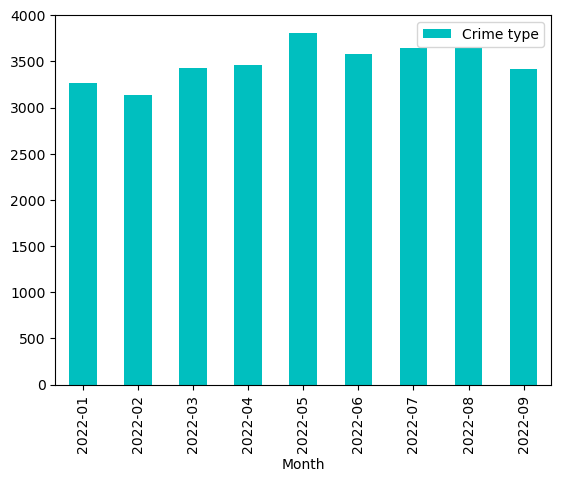

In [46]:
coventry_df_plot = cov_df.plot.bar(color = "c")
conventry_df_plot
plt.title("Total Number of crimes month wise - COVENTRY")
plt.xlabel("months-2022")
plt.ylabel("number of crimes")



In [40]:
sandwell_df = new_crime_data_sandwell.groupby(["Month"]).agg({"Crime type":"count"})
sandwell_df

,Crime type
Month,
2022-01,3240
2022-02,3163
2022-03,3443
2022-04,3254
2022-05,3654
2022-06,3349
2022-07,3533
2022-08,3258
2022-09,3274


Text(0, 0.5, 'number of crimes')

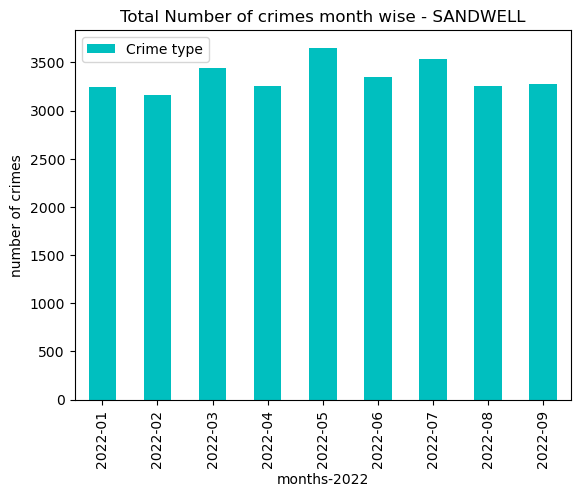

In [41]:
sandwell_df_plot = sandwell_df.plot.bar(color = "c")
sandwell_df_plot
plt.title("Total Number of crimes month wise - SANDWELL")
plt.xlabel("months-2022")
plt.ylabel("number of crimes")



In [15]:
bham_df2 = new_crime_data_bham.groupby(["Month","Crime type"]).agg({"Crime type":"count"})
bham_df2

Crime type
Month   Crime type                              
2022-01 Bicycle theft                         70
        Burglary                             912
        Criminal damage and arson            978
        Drugs                                308
        Other crime                          199
...                                          ...
2022-09 Robbery                              380
        Shoplifting                          587
        Theft from the person                201
        Vehicle crime                       1409
        Violence and sexual offences        5841

[117 rows x 1 columns]

In [1]:
#bham_df_plotting = bham_df.plot.bar(color = "b",figsize = (15,7))
#bham_df_plotting

<AxesSubplot:xlabel='Month'>

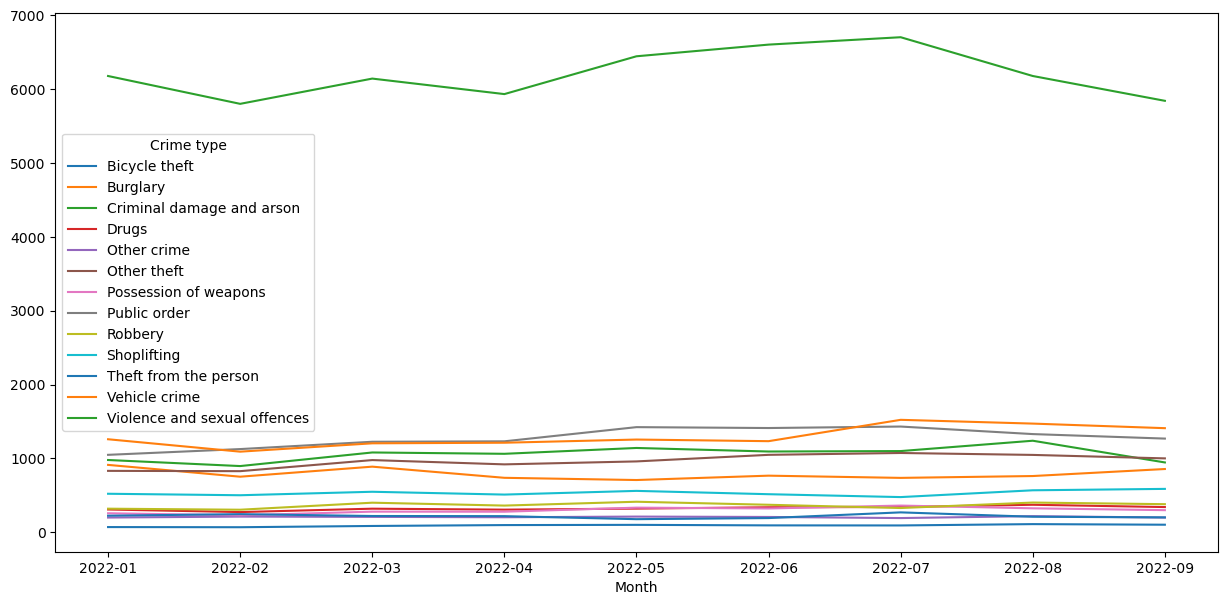

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
new_crime_data_bham.groupby(["Month","Crime type"]).count()["Crime ID"].unstack().plot(ax=ax)

In [30]:
#pd.pivot(index=g, columns=df['months'], values=df['value']).rename(columns=d).plot()

NameError: name 'g' is not defined